In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import local_functions
import model_operations
import sensor_info

import importlib; importlib.reload(model_operations)

<module 'model_operations' from '/edata2/spencer/rfi_prediction/AMSR2/GCOMW1/model_operations.py'>

In [5]:
test_file = '/pdata4/archive/GPM/1Base_AMSR2_V7/1209/120915/1Base.GCOMW1.AMSR2.TB2021.20120915-S135739-E153631.001763.V07A.HDF5'

mlflag = model_operations.ml_quality_control(test_file, error_threshold=7)
print(np.sum(mlflag > 0., axis=0))

/edata2/spencer/rfi_prediction/AMSR2/GCOMW1/local_functions.py:54: RuntimeWarning: invalid value encountered in cast
  qual[:,:,0] = f.Pixel_Data_Quality_6_to_36.values[:,::2]


[ 58  14  65  11 178 444  43 574  95 118 139 233]


In [7]:
chan_desc = np.array(sensor_info.channel_descriptions)
chan_desc

array(['6V', '6H', '7V', '7H', '10V', '10H', '19V', '19H', '24V', '24H',
       '37V', '37H'], dtype='<U3')

/edata2/spencer/rfi_prediction/AMSR2/GCOMW1/local_functions.py:54: RuntimeWarning: invalid value encountered in cast
  qual[:,:,0] = f.Pixel_Data_Quality_6_to_36.values[:,::2]


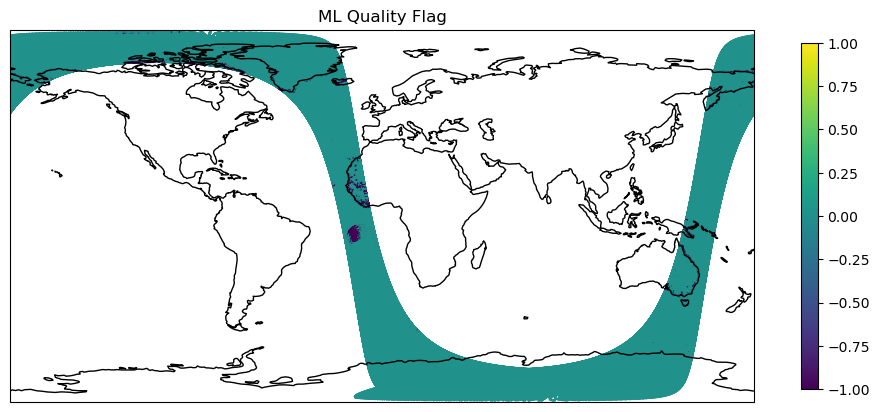

In [9]:
'''
Plot the flag
'''

data = local_functions.read_amsr2_l1b(test_file)

chan = ['6V']

chan_desc = np.array(sensor_info.channel_descriptions)
chan_indx = np.where(chan == chan_desc)[0]

fig = plt.figure(figsize=[12,10])
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
im = ax.scatter(data['lon'], data['lat'], c=mlflag[:,chan_indx], transform=ccrs.PlateCarree(), s=0.3)
plt.colorbar(mappable=im, shrink=0.45)
plt.title('ML Quality Flag')
ax.coastlines()
plt.show()